In [1]:
import numpy as np
from ultralytics import YOLO


side_keypoint_model = YOLO("/Users/aftaabhussain/Work/Cattle-weight/YOLO Models/side_keypoint_model/last.pt")  # load a custom mode
rear_keypoint_model = YOLO("/Users/aftaabhussain/Work/Cattle-weight/YOLO Models/rear_keypoint_model/last.pt")  # load a custom mode
side_segmentation_model = YOLO("/Users/aftaabhussain/Work/Cattle-weight/YOLO Models/side_segmentation_model/last.pt")  # load a custom mode
rear_segmentation_model = YOLO("/Users/aftaabhussain/Work/Cattle-weight/YOLO Models/rear_segmentation_model/last.pt")  # load a custom mode
# Predict with the model
side_image = "/Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01 (1).jpeg"
rear_image = "/Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01.jpeg"
# results = side_keypoint_model(image)  # predict on an image
def infer(model, image, filename="result side keypoint.jpg"):
    results = model(image)
    for result in results:
        boxes = result.boxes  # Boxes object for bounding box outputs
        masks = result.masks  # Masks object for segmentation masks outputs
        keypoints = result.keypoints  # Keypoints object for pose outputs
        probs = result.probs  # Probs object for classification outputs
        obb = result.obb  # Oriented boxes object for OBB outputs
        print(result.masks)
        result.show()  # display to screen
        result.save(filename="result side keypoint.jpg")
infer(side_keypoint_model, side_image, filename="result side keypoint.jpg")
infer(rear_keypoint_model, rear_image, filename="result rear keypoint.jpg")
infer(side_segmentation_model, side_image, filename="result side segmentation.jpg")
infer(rear_segmentation_model, rear_image, filename="result rear segmentation.jpg")

image 1/1 /Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01 (1).jpeg: 480x640 1 cow, 574.1ms
Speed: 15.1ms preprocess, 574.1ms inference, 104.2ms postprocess per image at shape (1, 3, 480, 640)
None
image 1/1 /Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01.jpeg: 640x480 1 cow, 405.1ms
Speed: 13.2ms preprocess, 405.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
None
image 1/1 /Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01 (1).jpeg: 480x640 1 cattle, 890.8ms
Speed: 25.2ms preprocess, 890.8ms inference, 73.8ms postprocess per image at shape (1, 3, 480, 640)
ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
or

In [2]:
result

NameError: name 'result' is not defined

In [3]:
model = side_segmentation_model
results = model(side_image)
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    print(result.masks)
    result.show()  # display to screen
    result.save(filename="result side keypoint.jpg")

image 1/1 /Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01 (1).jpeg: 480x640 1 cattle, 211.6ms
Speed: 3.8ms preprocess, 211.6ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)
ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
orig_shape: (1200, 1600)
shape: torch.Size([1, 480, 640])
xy: [array([[      772.5,         510],
       [        770,       512.5],
       [        770,         515],
       [        765,         520],
       [      752.5,         520],
       [        745,       527.5],
       [      742.5,       527.5],
       [        740,         530],
       [      732.5,         530],
       [        730,       532.5],
       [        730,         535],
    

In [4]:
type(results)

list

In [5]:
type(result)

ultralytics.engine.results.Results

In [9]:
import torch

def count_pixels_per_class(results):
  """Counts the number of pixels for each class in the segmentation results.

  Args:
      results: An ultralytics.engine.results.Results object containing the segmentation masks.

  Returns:
      A numpy array containing the class counts.
  """
  for result in results:
  # Get the masks tensor
    masks = results.masks.cpu().numpy()

  # Flatten the masks to a 1D array
  masks_flat = masks.flatten()

  # Convert mask values (which might be class IDs) to long for torch.bincount
  masks_flat = torch.tensor(masks_flat, dtype=torch.long)

  # Count the occurrences of each class
  class_counts = torch.bincount(masks_flat).numpy()

  return class_counts

# Example usage
results = model(side_image)
class_counts = count_pixels_per_class(results)
print(class_counts)


image 1/1 /Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01 (1).jpeg: 480x640 1 cattle, 193.6ms
Speed: 3.0ms preprocess, 193.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


AttributeError: 'list' object has no attribute 'masks'

In [23]:
masks = masks.cpu().numpy()

In [52]:
model = side_segmentation_model
results = model(side_image)
count = 0
for result in results:
    count +=1
    print(count)
    print(result)

image 1/1 /Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01 (1).jpeg: 480x640 1 cattle, 232.1ms
Speed: 4.2ms preprocess, 232.1ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)
1
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'sticker', 1: 'background', 2: 'cattle'}
obb: None
orig_img: array([[[ 52,  74,  62],
        [ 50,  72,  60],
        [ 52,  70,  57],
        ...,
        [144, 131, 139],
        [144, 131, 139],
        [144, 131, 139]],

       [[ 45,  65,  53],
        [ 47,  67,  55],
        [ 54,  72,  59],
        ...,
        [144, 131, 139],
        [144, 131, 139],
        [144, 131, 139]],

       [[ 43,  59,  48],
        [ 44,  60,  49],
        [ 53,  67,  55],
        ...,
        [144, 131, 139],
        [144, 131, 139],
        [144, 131, 139]],

       ...,

       [[139, 150, 154],
 

In [54]:
np.unique(result.masks.xy[0])

array([        510,       512.5,         515,       517.5,         520,       522.5,         525,       527.5,         530,       532.5,         535,       537.5,         540,       542.5,         545,       547.5,         550,       552.5,         555,       557.5,         560,         565,         570,       572.5,
               575,       577.5,         580,       582.5,         585,       587.5,         590,       592.5,         595,       597.5,         600,       602.5,         605,       607.5,         610,         615,       617.5,         620,       622.5,         625,         635,       637.5,         640,       642.5,
               645,       647.5,         650,       652.5,         665,         670,       672.5,         675,       677.5,         680,       682.5,         685,       687.5,       692.5,       702.5,       707.5,         710,       712.5,         715,       717.5,         720,       722.5,         725,       727.5,
               730,       732.5,         73

In [55]:
import numpy as np

def get_class_pixel_counts(mask):
  """
  Counts the number of pixels belonging to each class in a YOLO segmentation mask.

  Args:
      mask: A 2D NumPy array representing the segmentation mask. Each element represents the class
          label for the corresponding pixel.

  Returns:
      A dictionary where keys are unique class labels and values are the corresponding pixel counts.
  """

  # Ensure mask is a NumPy array
  if not isinstance(mask, np.ndarray):
    raise TypeError("Input mask must be a NumPy array.")

  # Get unique class labels
  unique_classes = np.unique(mask)

  # Initialize dictionary to store pixel counts
  class_pixel_counts = {cls: 0 for cls in unique_classes}

  # Count pixels for each class
  for cls in unique_classes:
    class_pixel_counts[cls] = np.count_nonzero(mask == cls)

  return class_pixel_counts

# Example usage with result.masks.xy[0] (assuming it's a 2D NumPy array)
mask = result.masks.xy[0]
class_pixel_counts = get_class_pixel_counts(mask)

# Print the class pixel counts
print(class_pixel_counts)


{510.0: 2, 512.5: 3, 515.0: 1, 517.5: 2, 520.0: 6, 522.5: 5, 525.0: 4, 527.5: 6, 530.0: 9, 532.5: 4, 535.0: 5, 537.5: 4, 540.0: 5, 542.5: 3, 545.0: 3, 547.5: 2, 550.0: 2, 552.5: 3, 555.0: 3, 557.5: 2, 560.0: 1, 565.0: 1, 570.0: 3, 572.5: 2, 575.0: 1, 577.5: 3, 580.0: 3, 582.5: 2, 585.0: 4, 587.5: 3, 590.0: 3, 592.5: 3, 595.0: 2, 597.5: 6, 600.0: 2, 602.5: 3, 605.0: 3, 607.5: 4, 610.0: 4, 615.0: 3, 617.5: 2, 620.0: 4, 622.5: 3, 625.0: 2, 635.0: 3, 637.5: 2, 640.0: 3, 642.5: 5, 645.0: 5, 647.5: 2, 650.0: 1, 652.5: 2, 665.0: 1, 670.0: 3, 672.5: 2, 675.0: 3, 677.5: 3, 680.0: 3, 682.5: 2, 685.0: 1, 687.5: 2, 692.5: 2, 702.5: 1, 707.5: 2, 710.0: 5, 712.5: 1, 715.0: 5, 717.5: 4, 720.0: 6, 722.5: 5, 725.0: 2, 727.5: 5, 730.0: 3, 732.5: 3, 735.0: 2, 737.5: 5, 740.0: 3, 742.5: 3, 745.0: 6, 747.5: 10, 750.0: 8, 752.5: 7, 755.0: 3, 757.5: 9, 760.0: 10, 762.5: 7, 765.0: 11, 767.5: 8, 770.0: 10, 772.5: 6, 775.0: 5, 777.5: 5, 780.0: 5, 782.5: 5, 785.0: 5, 787.5: 3, 790.0: 11, 792.5: 7, 795.0: 3, 797.

In [56]:
masks = results[0].masks.data.cpu().numpy()

In [57]:
image_area = masks.shape[1] * masks.shape[2]

In [58]:
for i, mask in enumerate(masks):
        binary_mask = (mask > 0).astype(np.uint8) * 255  # Convert mask to binary

In [59]:
import cv2
color_mask = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)

In [60]:
contours, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [61]:
contour = contours[0]  # Retrieve the first contour
area = cv2.contourArea(contour)

In [62]:
area

49.0

TypeError: 'Axes' object is not subscriptable

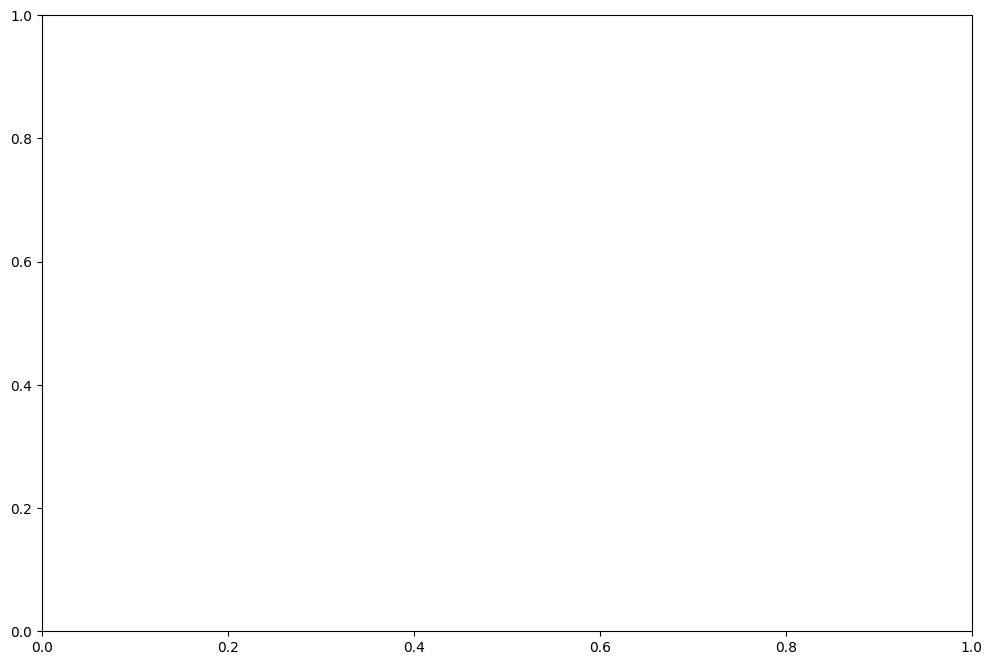

In [63]:
import matplotlib.pyplot as plt
# Initialize variables to hold total area and individual areas
total_area = 0
area_list = []

# Set up the subplot for displaying masks
fig, axes = plt.subplots(1, len(masks), figsize=(12, 8))

# Perform operations if masks are available
if results[0].masks is not None:
    masks = results[0].masks.data.cpu().numpy()   # Retrieve masks as numpy arrays
    image_area = masks.shape[1] * masks.shape[2]  # Calculate total number of pixels in the image
    for i, mask in enumerate(masks):
        binary_mask = (mask > 0).astype(np.uint8) * 255  # Convert mask to binary
        color_mask = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)  # Convert binary mask to color
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # Find contours in the binary mask
        contour = contours[0]  # Retrieve the first contour
        area = cv2.contourArea(contour)  # Calculate the area of the pothole
        area_list.append(area)  # Append area to the list
        cv2.drawContours(color_mask, [contour], -1, (0, 255, 0), 3)  # Draw the contour on the mask

        # Display the mask with the green contour
        axes[i].imshow(color_mask)
        axes[i].set_title(f'Pothole {i+1}')
        axes[i].axis('off')

# Display all masks
plt.tight_layout()
plt.show()

# Calculate and print areas after displaying the images
for i, area in enumerate(area_list):
    print(f"Area of Pothole {i+1}: {area} pixels")  
    total_area += area  # Sum the areas for total

# Calculate and print the total damaged area and percentage of road damaged by potholes
print("-"*50)
print(f"Total Damaged Area by Potholes: {total_area} pixels")
print(f"Total Pixels in Image: {image_area} pixels")
print(f"Percentage of Road Damaged: {(total_area / image_area) * 100:.2f}%")

image 1/1 /Users/aftaabhussain/Work/yolo segmentation/B4/data/images/train/47_b4-2_s_155_F.jpg: 480x640 1 sticker, 1 cattle, 220.8ms
Speed: 4.8ms preprocess, 220.8ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)


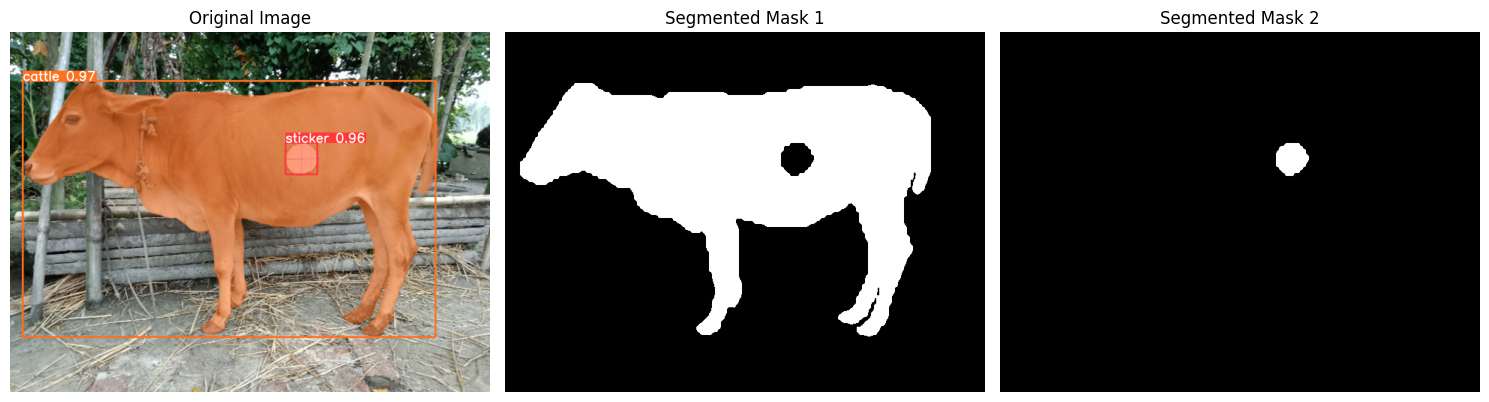

In [65]:
# # Define the path to the validation images
# valid_images_path = os.path.join(dataset_path, 'valid', 'images')
# 
# # List all jpg images in the directory
# image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]
# 
# # Select a sample image
# selected_image = image_files[45]

# Perform inference on the selected image
image_path = "/Users/aftaabhussain/Work/yolo segmentation/B4/data/images/train/47_b4-2_s_155_F.jpg"
results = side_segmentation_model.predict(source=image_path, imgsz=640, conf=0.5)
annotated_image = results[0].plot()
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Determine the number of subplots needed (1 original + number of masks)
num_subplots = 1 + (len(results[0].masks.data) if results[0].masks is not None else 0)

# Initialize the subplot with 1 row and n columns
fig, axes = plt.subplots(1, num_subplots, figsize=(15, 5))

# Display the original annotated image
axes[0].imshow(annotated_image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

# If multiple masks, iterate and display each mask
if results[0].masks is not None:
    masks = results[0].masks.data.cpu().numpy()
    for i, mask in enumerate(masks):
        # Threshold the mask to make sure it's binary
        # Any value greater than 0 is set to 255, else it remains 0
        binary_mask = (mask > 0).astype(np.uint8) * 255
        axes[i+1].imshow(binary_mask, cmap='gray')
        axes[i+1].set_title(f'Segmented Mask {i+1}')
        axes[i+1].axis('off')

# Adjust layout and display the subplot
plt.tight_layout()
plt.show()

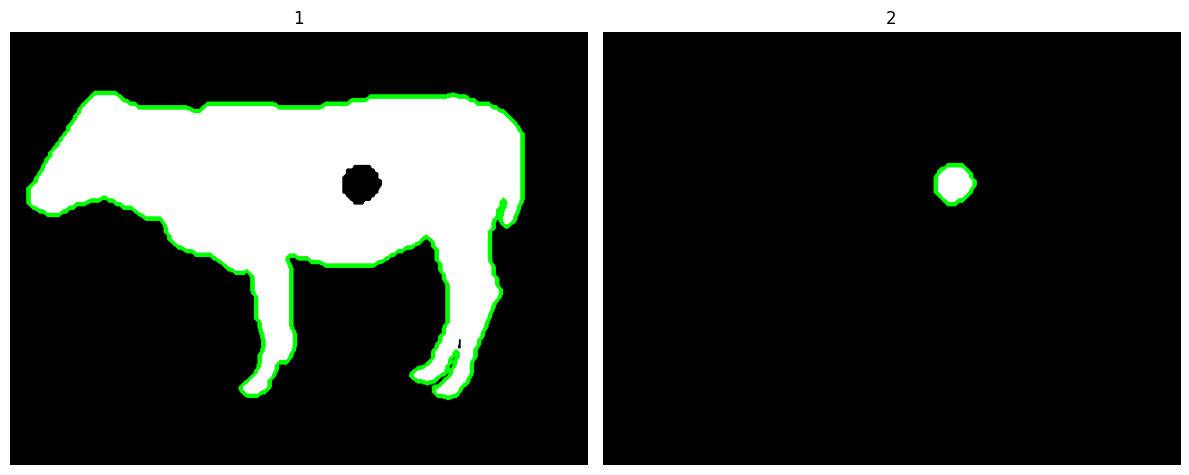

Area of Pothole 1: 93682.0 pixels
Area of Pothole 2: 1403.0 pixels
--------------------------------------------------
Total Damaged Area by Potholes: 95085.0 pixels
Total Pixels in Image: 307200 pixels
Percentage of Road Damaged: 30.95%


In [69]:
# Initialize variables to hold total area and individual areas
total_area = 0
area_list = []

# Set up the subplot for displaying masks
fig, axes = plt.subplots(1, len(masks), figsize=(12, 8))

# Perform operations if masks are available
if results[0].masks is not None:
    masks = results[0].masks.data.cpu().numpy()   # Retrieve masks as numpy arrays
    image_area = masks.shape[1] * masks.shape[2]  # Calculate total number of pixels in the image
    for i, mask in enumerate(masks):
        binary_mask = (mask > 0).astype(np.uint8) * 255  # Convert mask to binary
        color_mask = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)  # Convert binary mask to color
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # Find contours in the binary mask
        contour = contours[0]  # Retrieve the first contour
        area = cv2.contourArea(contour)  # Calculate the area of the pothole
        area_list.append(area)  # Append area to the list
        cv2.drawContours(color_mask, [contour], -1, (0, 255, 0), 3)  # Draw the contour on the mask

        # Display the mask with the green contour
        axes[i].imshow(color_mask)
        axes[i].set_title(f'{i+1}')
        axes[i].axis('off')

# Display all masks
plt.tight_layout()
plt.show()

# Calculate and print areas after displaying the images
for i, area in enumerate(area_list):
    print(f"Area of Pothole {i+1}: {area} pixels")  
    total_area += area  # Sum the areas for total

# Calculate and print the total damaged area and percentage of road damaged by potholes
print("-"*50)
print(f"Total Damaged Area by Potholes: {total_area} pixels")
print(f"Total Pixels in Image: {image_area} pixels")
print(f"Percentage of Road Damaged: {(total_area / image_area) * 100:.2f}%")

In [67]:
masks.shape[2]

640

In [68]:
masks.shape[1]

480

In [70]:
area_list

[93682.0, 1403.0]

In [15]:
from ultralytics import YOLO


side_keypoint_model = YOLO("/Users/aftaabhussain/Work/Cattle-weight/YOLO Models/side_keypoint_model/last.pt")  # load a custom mode
rear_keypoint_model = YOLO("/Users/aftaabhussain/Work/Cattle-weight/YOLO Models/rear_keypoint_model/last.pt")  # load a custom mode
side_segmentation_model = YOLO("/Users/aftaabhussain/Work/Cattle-weight/YOLO Models/side_segmentation_model/last.pt")  # load a custom mode
rear_segmentation_model = YOLO("/Users/aftaabhussain/Work/Cattle-weight/YOLO Models/rear_segmentation_model/last.pt")  # load a custom mode
# Predict with the model
side_image = "/Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01 (1).jpeg"

rear_image = "/Users/aftaabhussain/Work/yolo segmentation/B4/Rear/images/5_b4-1_r_77_M.jpg"
# results = side_keypoint_model(image)  # predict on an image
def infer(model, image, filename="result side keypoint.jpg"):
    results = model(image)
    for result in results:
        keypoints = result.keypoints  # Keypoints object for pose outputs
        result.show()  # display to screen
        # result.save(filename="result side keypoint.jpg")
        # print(keypoints.xy)
        keys = keypoints.xy
    return keys
key = infer(side_keypoint_model, side_image, filename="result side keypoint.jpg")
# infer(rear_keypoint_model, rear_image, filename="result rear keypoint.jpg")
# infer(side_segmentation_model, side_image, filename="result side segmentation.jpg")
# infer(rear_segmentation_model, rear_image, filename="result rear segmentation.jpg")

image 1/1 /Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01 (1).jpeg: 480x640 1 cow, 187.2ms
Speed: 13.0ms preprocess, 187.2ms inference, 11.0ms postprocess per image at shape (1, 3, 480, 640)


In [10]:
key[0][0][0]

tensor(694.5605)

In [16]:
k = key.numpy()

In [17]:
k[0]

array([[      762.2,      517.64],
       [     1265.8,      576.62],
       [     744.34,      684.85],
       [     865.77,      525.07],
       [     872.24,       761.1],
       [       1105,       505.4],
       [     1106.3,      733.64],
       [       1155,      497.88],
       [       1155,      970.82]], dtype=float32)

In [20]:
import matplotlib.pyplot as plt
plt.scatter(k[0])

TypeError: scatter() missing 1 required positional argument: 'y'

In [21]:
k[0]

array([[      762.2,      517.64],
       [     1265.8,      576.62],
       [     744.34,      684.85],
       [     865.77,      525.07],
       [     872.24,       761.1],
       [       1105,       505.4],
       [     1106.3,      733.64],
       [       1155,      497.88],
       [       1155,      970.82]], dtype=float32)

In [28]:
k[0][1]

array([     1265.8,      576.62], dtype=float32)

In [30]:
x_vals = []
y_vals = []
for i in range(len(k[0])):
    x_vals.append(k[0][i][0])
    y_vals.append((k[0][i][1]))
    

In [31]:
x_vals

[762.2037,
 1265.7992,
 744.33746,
 865.7666,
 872.2434,
 1104.9977,
 1106.3289,
 1154.9993,
 1155.0408]

In [24]:
k[0][0][0]

762.2037

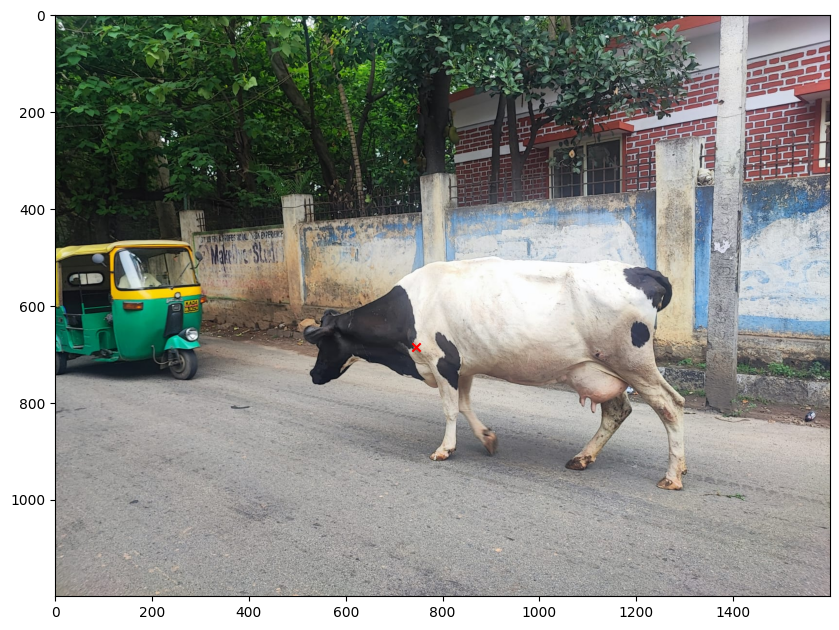

In [43]:
from PIL import Image
def visualize_first_image(image, x_vals, y_vals):
    # with open(json_path, 'r') as file:
    #     coco_data = json.load(file)
    # 
    # first_image_filename = coco_data['images'][0]['file_name']
    # first_image_keypoints = coco_data['annotations'][0]['keypoints']
    index = 2
    keypoint_x_vals = x_vals[index]
    keypoint_y_vals = y_vals[index]

    image_path = image
    image = Image.open(image_path)

    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.scatter(keypoint_x_vals, keypoint_y_vals, c='r', marker="x")
    plt.show()
visualize_first_image(image = '/Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01 (1).jpeg',x_vals = x_vals, y_vals = y_vals)